In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ssbc import generate_rigorous_pac_report
import ssbc

In [2]:
p_class1 = 0.10
beta_params_class0 = (2, 7)
beta_params_class1 = (4, 2)

alpha_0 = 0.10
delta_0 = 0.10
alpha_1 = 0.10
delta_1 = 0.10

N_samples = 500

In [3]:
sim = ssbc.BinaryClassifierSimulator(
    p_class1=p_class1, beta_params_class0=beta_params_class0, beta_params_class1=beta_params_class1
)

In [4]:
labels, probs = sim.generate(N_samples)
class_data = ssbc.split_by_class(labels=labels, probs=probs)
print(np.mean(probs[labels==0, 0]))
print(np.mean(probs[labels==1, 1]))
print(np.sum(labels==1))
print(np.sum(labels==0))


0.7651113059565858
0.6264166114587717
60
440


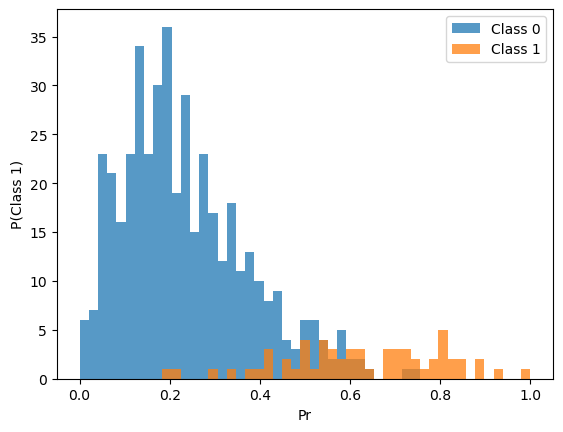

In [5]:
plt.hist(class_data[0]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.hist(class_data[1]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.legend(["Class 0", "Class 1"])
plt.ylabel("P(Class 1)")
plt.xlabel("Pr")
plt.savefig("tst-2-7_7_2.svg")
plt.show()

In [6]:
report = generate_rigorous_pac_report(
    labels=labels,
    probs=probs,
    alpha_target=0.10,
    delta=0.10,
    test_size=N_samples,
    ci_level=0.95,
    use_union_bound=False,
    prediction_method="all",
    n_jobs=-1,
    verbose=True,
    loo_inflation_factor=None,
    use_loo_correction=True
    
)

OPERATIONAL PAC-CONTROLLED CONFORMAL PREDICTION REPORT

Parameters:
  Test size: 500
  CI level: 95% (Clopper-Pearson)
  PAC guarantee levels:
    Class 0: δ = 0.10 (90% confidence)
    Class 1: δ = 0.10 (90% confidence)
    Union bound: not applied (metrics validated independently)
    Class guarantees: validated separately

CLASS 0 (Conditioned on True Label = 0)
  Calibration size: n = 440
  Target miscoverage: α = 0.100
  SSBC-corrected α:   α' = 0.0816
  PAC risk:           δ = 0.100
  Conformal threshold: 0.4552

  Calibration summary (n = 440)
     Empirical rates on calibration data. Intervals are 95% Clopper-Pearson.
     These do not include PAC guarantees.
     Abstentions:              19 /  440  =  4.32%   95% CI: [0.026, 0.067]
     Singletons:            421 /  440  = 95.68%   95% CI: [0.933, 0.974]
       Correct:             405 /  440  = 92.05%   95% CI: [0.891, 0.944]
       Incorrect:             16 /  440  =  3.64%   95% CI: [0.021, 0.058]
     Error | singleton:  

In [7]:
sel0 = labels == 0
p0 = probs[sel0]
no = len(p0)
print(p0)
t0 = np.quantile( 1-p0[:,0],  (1-0.05555555555555555), method='higher')
print(t0)
sets = (1-p0) < t0
print(sets)

[[0.86281101 0.13718899]
 [0.88025134 0.11974866]
 [0.69948143 0.30051857]
 [0.75583485 0.24416515]
 [0.55405886 0.44594114]
 [0.79399193 0.20600807]
 [0.60406963 0.39593037]
 [0.85094274 0.14905726]
 [0.80011812 0.19988188]
 [0.94020008 0.05979992]
 [0.9009896  0.0990104 ]
 [0.77303383 0.22696617]
 [0.86740762 0.13259238]
 [0.88327446 0.11672554]
 [0.61103335 0.38896665]
 [0.65570958 0.34429042]
 [0.6304403  0.3695597 ]
 [0.62302763 0.37697237]
 [0.93705195 0.06294805]
 [0.94908903 0.05091097]
 [0.52553597 0.47446403]
 [0.72190574 0.27809426]
 [0.75096114 0.24903886]
 [0.87032394 0.12967606]
 [0.86021085 0.13978915]
 [0.7355327  0.2644673 ]
 [0.81645998 0.18354002]
 [0.76952874 0.23047126]
 [0.89563947 0.10436053]
 [0.86034029 0.13965971]
 [0.73324496 0.26675504]
 [0.6579529  0.3420471 ]
 [0.6904643  0.3095357 ]
 [0.48104307 0.51895693]
 [0.65668747 0.34331253]
 [0.91575015 0.08424985]
 [0.47664347 0.52335653]
 [0.76660722 0.23339278]
 [0.96246112 0.03753888]
 [0.78674116 0.21325884]


In [ ]:
sel1 = labels == 1
p1 = probs[sel1]
plt.hist(p1[:,1], bins=100)
plt.show()
n1 = len(p1)
t1 = np.quantile( 1-p1[:,1],  (1-0.03333333333333333), method='higher')
print(t1)
sets1 = (1-p1) < t1
print(p1)
print(sets1)

In [ ]:
tau_0 = report["calibration_result"][0]["threshold"]
tau_1 = report["calibration_result"][1]["threshold"]
plt.hist(1-class_data[0]["probs"][:, 0], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.hist(1-class_data[1]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.ylabel("Occurance")
plt.xlabel("NCS(Class)")
plt.vlines(tau_0, 0, 40,color='navy', ls="--", lw=1)
plt.vlines(tau_1, 0, 40,color='orange', ls="--", lw=1)
plt.ylim(0,40)
plt.legend([ r"$\tau_0$", r"$\tau_1$", "Class 0", "Class 1"] )
plt.savefig("tst-2-7_7_2.svg")
plt.show()

In [ ]:
validation = ssbc.validate_pac_bounds(
    report=report,
    simulator=sim,
    test_size=N_samples,      # Size of each test set
    n_trials=100000,       # Number of independent trials (increase for better stats)
    seed=42,             # For reproducibility
    verbose=True,
    n_jobs=-1,           # Use all CPU cores
)

ssbc.print_validation_results(validation)


In [ ]:
results1 = ssbc.validate_prediction_interval_calibration(
    simulator=sim,
    n_calibration=N_samples,        # Size of each calibration dataset
    BigN=1000,                  # Number of different calibrations to test
    n_trials=1000,             # Test sets per calibration
    test_size=N_samples,
    ci_level=0.95,
    prediction_method="all",  # Compare all methods
    use_loo_correction=True,
    loo_inflation_factor=1.0,
    verbose=False,            # Minimal printouts
    n_jobs=-1,
    seed=0
)
# Print results


In [ ]:
df1 = ssbc.get_calibration_bounds_dataframe(results1)

In [ ]:
from ssbc import validate_prediction_interval_calibration, get_calibration_bounds_dataframe

In [ ]:
from ssbc import (
    validate_prediction_interval_calibration,
    get_calibration_bounds_dataframe,
    plot_calibration_excess,
)
def plotter(this_df):
    # Plot excess for singleton marginal    
    
    this_df_m_single = this_df[(this_df['scope'] == 'marginal') & (this_df['metric'] == 'singleton_rate_class0')]
    plot_calibration_excess(this_df_m_single, scope='marginal', metric='singleton_rate_class0', methods=['analytical', 'exact', 'hoeffding'])
    
    this_df_m_single = this_df[(this_df['scope'] == 'marginal') & (this_df['metric'] == 'singleton_rate_class1')]
    plot_calibration_excess(this_df_m_single, scope='marginal', metric='singleton_rate_class1', methods=['analytical', 'exact', 'hoeffding'])
    
    this_df_m_single_e = this_df[(this_df['scope'] == 'marginal') & (this_df['metric'] == 'singleton_error_class0')]
    plot_calibration_excess(this_df_m_single_e, scope='marginal', metric='singleton_error_class0', methods=['analytical', 'exact', 'hoeffding'])
    
    this_df_m_single_e = this_df[(this_df['scope'] == 'marginal') & (this_df['metric'] == 'singleton_error_class1')]
    plot_calibration_excess(this_df_m_single_e, scope='marginal', metric='singleton_error_class1', methods=['analytical', 'exact', 'hoeffding'])

    this_df_m_doublet = this_df[(this_df['scope'] == 'marginal') & (this_df['metric'] == 'doublet_rate_class0')]
    plot_calibration_excess(this_df_m_doublet, scope='marginal', metric='doublet_rate_class0', methods=['analytical', 'exact', 'hoeffding'])
    
    this_df_m_abstention = this_df[(this_df['scope'] == 'marginal') & (this_df['metric'] == 'doublet_rate_class1')]
    plot_calibration_excess(this_df_m_abstention, scope='marginal', metric='doublet_rate_class1', methods=['analytical', 'exact', 'hoeffding'])


In [ ]:
plotter(df1)

In [ ]:
ssbc.print_calibration_validation_results(results1)